In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE


We see that the following dataset is very unbalanced due to very less training examples for fraudulent transactions
For such machine learning problems, the accuracy metric is not a good measure to evaluate our model's performance

In [89]:
train_data = pd.read_csv('D:\VS Code Folders\CODSOFT\Credit Card Fraud Detection\credit card dataset\\fraudTrain.csv')
train_data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [3]:
test_data = pd.read_csv('D:\VS Code Folders\CODSOFT\Credit Card Fraud Detection\credit card dataset\\fraudTest.csv')
test_data['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [4]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

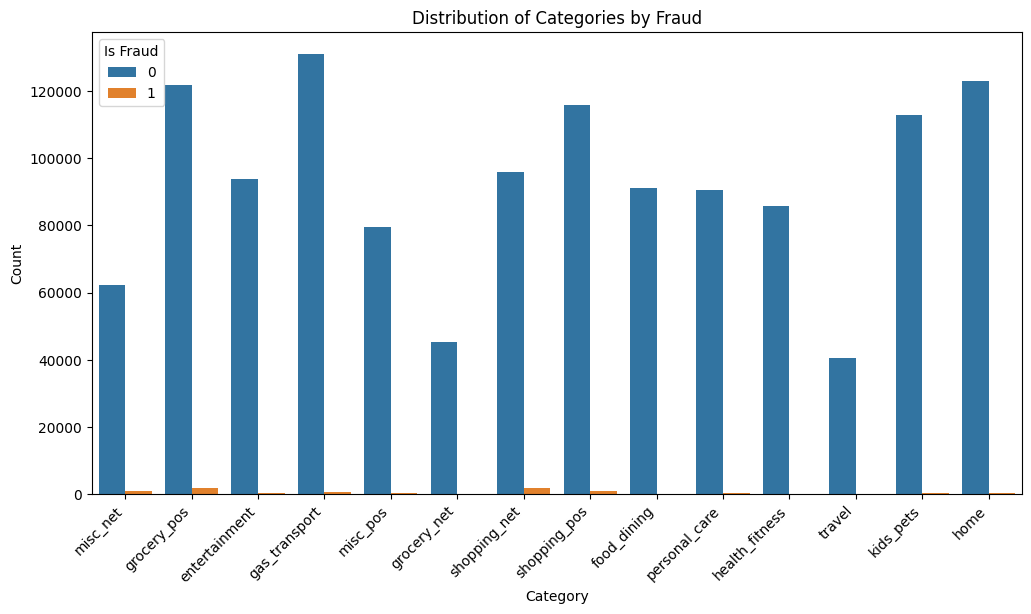

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=train_data)
plt.title('Distribution of Categories by Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

In [7]:
train_data['city'].value_counts()

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: count, Length: 894, dtype: int64

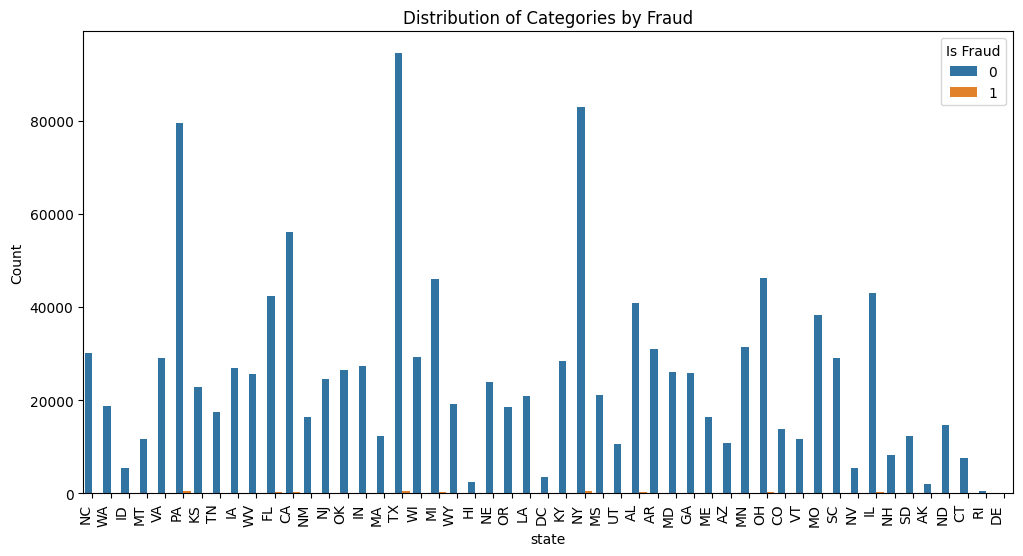

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='state', hue='is_fraud', data=train_data)
plt.title('Distribution of Categories by Fraud')
plt.xlabel('state')
plt.ylabel('Count')
plt.xticks(rotation=90, ha="right")
plt.legend(title='Is Fraud')
plt.show()

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

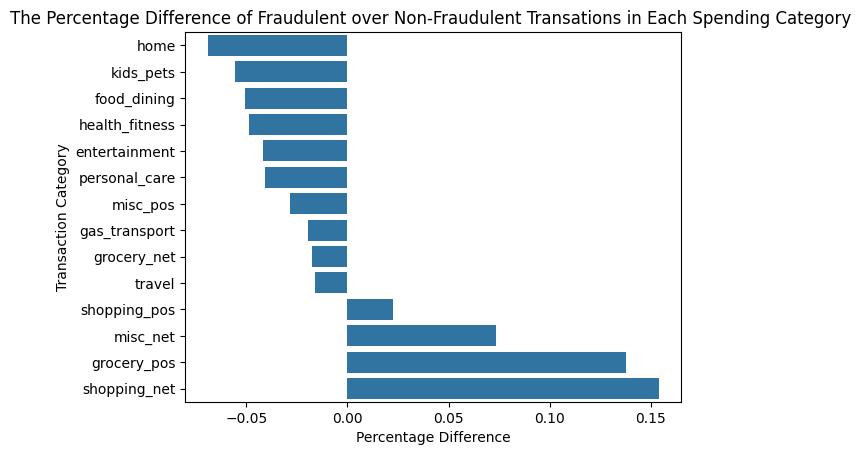

In [9]:
a=train_data[train_data['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=train_data[train_data['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=True))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

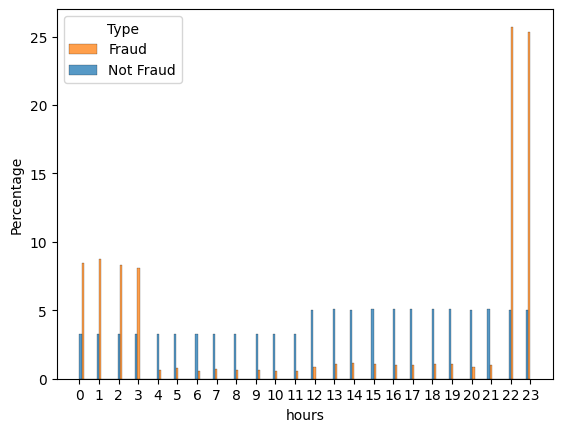

In [10]:
import datetime as dt
train_data['trans_date_trans_time']
train_data['hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
train_data['hour']
ax = sns.histplot(x = 'hour', data=train_data, hue = 'is_fraud', common_norm = False, stat = 'percent', multiple = 'dodge')
ax.set_xlabel('hours')
ax.set_ylabel('Percentage')
plt.xticks(np.arange(0, 24, 1))
plt.legend(title = 'Type', labels = ['Fraud', 'Not Fraud'])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_2808\2234799818.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


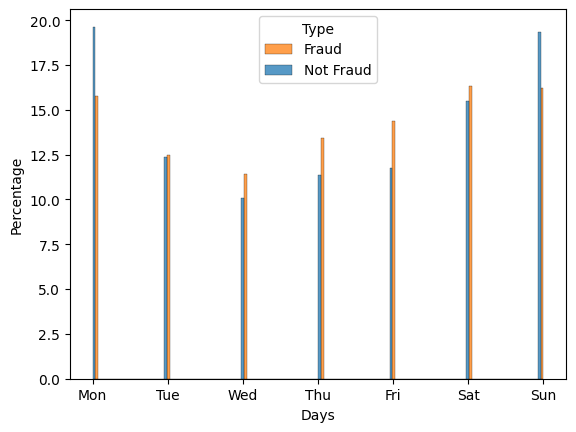

In [11]:
import datetime as dt
train_data['trans_date_trans_time']
train_data['day'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.dayofweek
ax = sns.histplot(x = 'day', data=train_data, hue = 'is_fraud', common_norm = False, stat = 'percent', multiple = 'dodge')
ax.set_xlabel('Days')
ax.set_ylabel('Percentage')
ax.set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.xticks(np.arange(0,7,1))
plt.legend(title = 'Type', labels = ['Fraud', 'Not Fraud'])
plt.show()

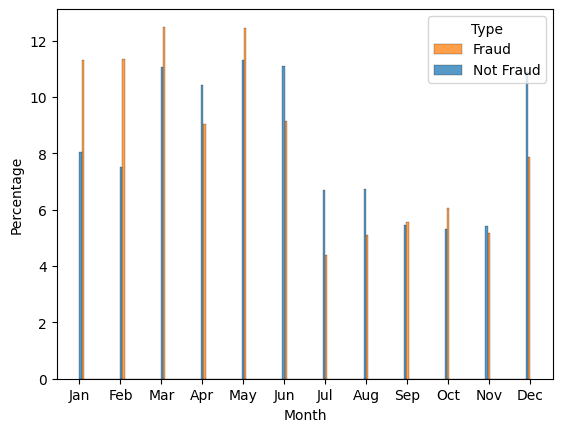

In [12]:
train_data['month']=pd.to_datetime(train_data['trans_date_trans_time']).dt.month
ax=sns.histplot(data=train_data, x="month", hue="is_fraud", common_norm=False, stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each State')

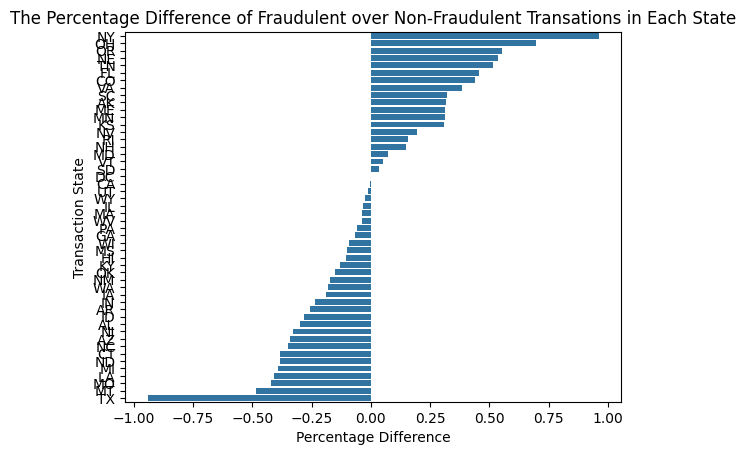

In [13]:
a = train_data['state'][train_data.is_fraud == 0].value_counts(normalize= True).to_frame().reset_index()
a.columns = ['state', 'not a fraud %']

b = train_data['state'][train_data.is_fraud == 1].value_counts(normalize= True).to_frame().reset_index()
b.columns = ['state', 'fraud %']

ab = a.merge(b, on = 'state')
ab['diff'] = ab['fraud %'] - ab['not a fraud %']
ab['diff']=ab['diff']*100
ax = sns.barplot(x = 'diff', y = 'state', data = ab.sort_values('diff', ascending= False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction State')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each State')


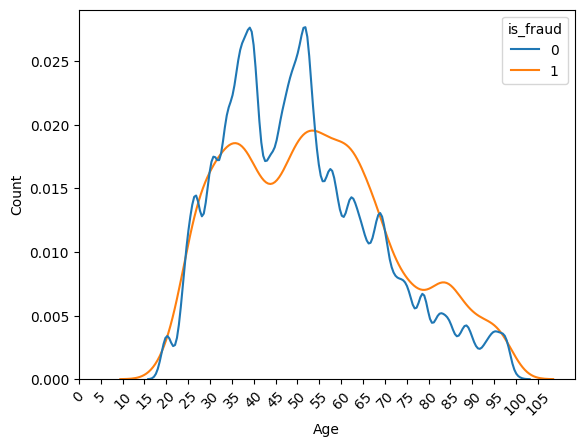

In [13]:
train_data['age'] = dt.date.today().year - pd.to_datetime(train_data['dob']).dt.year
sns.kdeplot(x = 'age', data = train_data, hue = 'is_fraud', common_norm=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(np.arange(0, 110, 5), rotation = 45)
plt.show()

The values of the city, jobs and the streets were too many, so we are not going to use these parameters while training our model
Similarly, the dob and the transaction times and dates have been entered in a separate column using the to_datetime function of the pandas. These additional parameters shall be useful to train our model and hopefully get better results.

In [14]:
train=train_data[['category','amt','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud', 'job']]
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train = train.apply(LabelEncoder().fit_transform)
train.head()

,category,amt,lat,long,city_pop,merch_lat,merch_long,age,hour,day,month,is_fraud,job
0,8,397,291,693,458,390185,861455,16,0,1,0,0,370
1,4,10623,964,60,43,1241513,78062,26,0,1,0,0,428
2,0,21906,736,88,486,1033312,119047,42,0,1,0,0,307
3,2,4400,931,91,367,1208203,115592,37,0,1,0,0,328
4,9,4096,398,753,22,557938,1027546,18,0,1,0,0,116


In [15]:
X = train.drop("is_fraud", axis=1)
y = train["is_fraud"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [16]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((907672, 12), (907672,), (389003, 12), (389003,))

In [17]:
y_val.value_counts()

is_fraud
0    386718
1      2285
Name: count, dtype: int64

Logistic Regression Model

In [21]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
log_reg_y_pred = lg.predict(X_val)

In [23]:
print("Classification Report Logistic Regression: \n", classification_report(y_val, log_reg_y_pred))

Classification Report Logistic Regression: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    386718
           1       0.23      0.07      0.11      2285

    accuracy                           0.99    389003
   macro avg       0.61      0.53      0.55    389003
weighted avg       0.99      0.99      0.99    389003



Linear SVC

In [40]:
from sklearn.svm import LinearSVC
esvc = LinearSVC(class_weight='balanced')
esvc.fit(X_train, y_train)
esvc_y_pred = esvc.predict(X_val)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [49]:
print("Classification Report Linear SVC Model: \n", classification_report(y_val, esvc_y_pred, target_names = ['Not Fraud', 'Fraud']))

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report Linear SVC Model: 
               precision    recall  f1-score   support

   Not Fraud       0.99      1.00      1.00    386718
       Fraud       0.00      0.00      0.00      2285

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003



C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


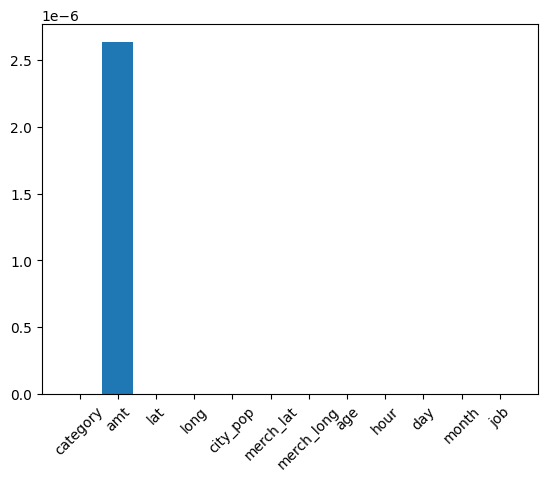

In [24]:
from sklearn.linear_model import Lasso 
lasso = Lasso(alpha=0.1) 
lasso_coef = lasso.fit(X_train.values, y_train.values).coef_ 
plt.bar(X_train.columns, lasso_coef) 
plt.xticks(rotation=45) 
plt.show() 

In [25]:
from sklearn.linear_model import Ridge 
scores = [] 
for alpha in [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]: 
    ridge = Ridge(alpha=alpha) 
    ridge.fit(X_train, y_train) 
    y_pred = ridge.predict(X_val) 
    scores.append(ridge.score(X_val, y_val)) 
scores

[0.07587660063117796,
 0.075876600629593,
 0.07587660061374601,
 0.07587660045527811,
 0.07587659887055753,
 0.07587658301925615]

Random Forest Classifier Model

In [26]:
Rfs = RandomForestClassifier(random_state=5)
Rfs.fit(X_train,y_train)
predicted=Rfs.predict(X_val)
print('Classification report Random Forest Classifier:\n', classification_report(y_val, predicted, target_names = ['Not Fraud', 'Fraud']))

Classification report Random Forest Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.96      0.77      0.85      2285

    accuracy                           1.00    389003
   macro avg       0.98      0.88      0.93    389003
weighted avg       1.00      1.00      1.00    389003



Training using a Neural Network simple Model

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
neural_network = Sequential()
neural_network.add(InputLayer((X_train.shape[1],)))
neural_network.add(Dense(2, activation = 'relu'))
neural_network.add(BatchNormalization())
# neural_network.add(Dropout(0.2))
neural_network.add(Dense(1, activation = 'sigmoid'))
checkpoint = ModelCheckpoint('neural_network', save_best_only = True)
neural_network.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [71]:
my_callbacks  = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=0,
                              mode='auto')]

In [72]:
neural_network.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 2)                 26        
                                                                 
 batch_normalization_8 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 1)                 3         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 4 (16.00 Byte)
_________________________________________________________________


In [73]:
neural_network.fit(X_train, y_train, validation_data = (X_val, y_val), callbacks = [checkpoint, my_callbacks], epochs = 5)

Epoch 1/5
28362/28365 [============================>.] - ETA: 0s - loss: 0.0364 - accuracy: 0.9926INFO:tensorflow:Assets written to: neural_network\assets


INFO:tensorflow:Assets written to: neural_network\assets


28365/28365 [==============================] - 155s 5ms/step - loss: 0.0364 - accuracy: 0.9926 - val_loss: 0.0238 - val_accuracy: 0.9930
Epoch 2/5
28365/28365 [==============================] - 112s 4ms/step - loss: 0.0247 - accuracy: 0.9941 - val_loss: 0.0250 - val_accuracy: 0.9928


In [74]:
def neural_network_predictions(model, X):
    return (model.predict(X).flatten() > 0.5).astype(int)

In [75]:
print('Classification report Neural Network:\n', classification_report(y_val, neural_network_predictions(neural_network, X_val), target_names = ['Not Fraud', 'Fraud']))

12157/12157 [==============================] - 29s 2ms/step
Classification report Neural Network:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    386718
       Fraud       0.35      0.25      0.29      2285

    accuracy                           0.99    389003
   macro avg       0.67      0.63      0.64    389003
weighted avg       0.99      0.99      0.99    389003



Decision Tree Classifier

In [87]:
DTC = DecisionTreeClassifier(random_state=3)
DTC.fit(X_train, y_train)
DTC_pred = DTC.predict(X_val)

In [88]:
print('Classification report Decision Tree Classifier:\n', classification_report(y_val, DTC_pred, target_names = ['Not Fraud', 'Fraud']))

Classification report Decision Tree Classifier:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    386718
       Fraud       0.79      0.81      0.80      2285

    accuracy                           1.00    389003
   macro avg       0.89      0.91      0.90    389003
weighted avg       1.00      1.00      1.00    389003



Now Preparing the Test Data

In [90]:
test_data['age'] = dt.date.today().year - pd.to_datetime(test_data['dob']).dt.year
test_data['day'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.dayofweek
test_data['hour'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.hour
test_data['month'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.month


In [91]:
test = test_data[['category','amt','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud', 'job']]
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test = test.apply(LabelEncoder().fit_transform)
test.head()

,category,amt,lat,long,city_pop,merch_lat,merch_long,age,hour,day,month,is_fraud,job
0,10,186,182,663,794,114727,392332,37,12,6,0,0,275
1,10,2884,524,96,89,277654,59408,15,12,6,0,0,392
2,5,4028,558,860,675,332793,510508,35,12,6,0,0,259
3,9,5905,29,666,702,19517,399880,18,12,6,0,0,407
4,13,219,808,523,254,501776,305489,50,12,6,0,0,196


In [95]:
X_test = test.drop("is_fraud", axis=1)
y_test = test["is_fraud"]

In [96]:
y_test.value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [97]:
X_test.shape, y_test.shape

((555719, 12), (555719,))

In [98]:
DTC_pred = DTC.predict(X_test)
print('Classification report Decision Tree Classifier:\n', classification_report(y_test, DTC_pred, target_names = ['Not Fraud', 'Fraud']))

Classification report Decision Tree Classifier:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    553574
       Fraud       0.38      0.31      0.34      2145

    accuracy                           1.00    555719
   macro avg       0.69      0.66      0.67    555719
weighted avg       0.99      1.00      1.00    555719



In [99]:
predicted=Rfs.predict(X_test)
print('Classification report Random Forest Classifier:\n', classification_report(y_test, predicted, target_names = ['Not Fraud', 'Fraud']))

Classification report Random Forest Classifier:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    553574
       Fraud       0.99      0.23      0.38      2145

    accuracy                           1.00    555719
   macro avg       0.99      0.62      0.69    555719
weighted avg       1.00      1.00      1.00    555719



In [100]:
print('Classification report Neural Network:\n', classification_report(y_test, neural_network_predictions(neural_network, X_test), target_names = ['Not Fraud', 'Fraud']))

17367/17367 [==============================] - 44s 3ms/step


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report Neural Network:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    553574
       Fraud       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
